In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns;
sns.set()

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

#Modelo
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [34]:
df_minsait = pd.read_csv('data/Modelar_UH2020.txt', sep="|", index_col='ID', encoding='utf-8')
print("Tamaño del conjunto de datos:  %d" % df_minsait.shape[0])
print("Número de variables: %d" % df_minsait.shape[1])
if df_minsait.index.is_unique:
    print('El índice es único.')
else:
    print('Los índices están duplicados.')
df_minsait.head()

Tamaño del conjunto de datos:  103230
Número de variables: 55
El índice es único.


,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,Q_R_4_0_7,...,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR,CADASTRALQUALITYID,CLASE
ID,,,,,,,,,,,,,,,,,,,,,
35984B9C3E7CD9A1,2207357872,165920300,0.000000,443.001300,616.001697,746.998401,872.996472,1009.000946,1159.002319,1342.002466,...,10951.926645,144.426900,0.557237,0.067249,0.057372,0.853127,2002,0.0,2,RESIDENTIAL
F9D04BF6D037F8FB,2189757160,165463267,0.000059,443.899011,627.999060,770.001611,904.999988,1032.998474,1165.001636,1316.000110,...,7048.367637,38.342550,0.709884,0.125156,0.147929,1.181953,1949,1.0,8,RESIDENTIAL
B89D5711AFF8C423,2240147335,165690752,0.000000,353.502274,523.003601,644.001831,760.997131,876.999634,1006.997498,1168.995544,...,7013.073271,108.794384,0.517702,0.058268,0.081666,1.401552,1986,1.0,5,RESIDENTIAL
1C3478AC1522E7E4,2227146459,165934099,0.000000,268.000613,376.999609,478.003784,575.001233,683.997742,809.005994,955.002960,...,6216.880538,155.224455,0.450871,0.053591,0.054201,1.011382,1999,1.0,2,RESIDENTIAL
4D12AA5009064345,2212350459,165681791,0.000000,318.997910,492.003845,632.999634,757.002197,882.999908,1019.008911,1175.993103,...,7092.767616,1789.873366,0.458819,0.012858,0.019936,1.550478,1966,8.0,6,RESIDENTIAL


In [35]:
scaler = MinMaxScaler()
df_minsait[df_minsait.columns[2:-9]] = scaler.fit_transform(df_minsait[df_minsait.columns[2:-9]])

In [36]:
df_red = df_minsait[df_minsait.columns[2:-42]]
df_green = df_minsait[df_minsait.columns[13:-31]]
df_blue = df_minsait[df_minsait.columns[24:-20]]
df_nir = df_minsait[df_minsait.columns[35:-9]]

df_red['Q_R_SUM'] = df_red.sum(axis=1)
df_green['Q_G_SUM'] = df_green.sum(axis=1)
df_blue['Q_B_SUM'] = df_blue.sum(axis=1)
df_nir['Q_NIR_SUM'] = df_nir.sum(axis=1)

In [37]:
df_sum = df_red['Q_R_SUM'] + df_green['Q_G_SUM'] + df_blue['Q_B_SUM'] + df_nir['Q_NIR_SUM']

In [38]:
df_sum.head(10)

ID
35984B9C3E7CD9A1    19.662425
F9D04BF6D037F8FB    17.552589
B89D5711AFF8C423    15.522294
1C3478AC1522E7E4    12.676767
4D12AA5009064345    13.346200
3E74975BD3F67ADE    15.388613
200CB7A318D959DA    16.693353
80E74C603F31D41C    15.103131
2FC79F1B7379EC1F    14.429414
A4A6D078FB1079E5    17.589105
dtype: float64

In [39]:
df_pca = pd.DataFrame(df_minsait.index).set_index('ID')

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(df_red[df_red.columns[:-1]])
df_pca = df_pca.merge(pd.DataFrame(index=df_red.index, data=pca.transform(df_red[df_red.columns[:-1]]), columns=['PCA_RED']), on='ID')

In [41]:
pca = PCA(n_components=1)
pca.fit(df_green[df_green.columns[:-1]])
df_pca = df_pca.merge(pd.DataFrame(index=df_green.index, data=pca.transform(df_green[df_green.columns[:-1]]), columns=['PCA_GREEN']), on='ID')

In [42]:
pca = PCA(n_components=1)
pca.fit(df_blue[df_blue.columns[:-1]])
df_pca = df_pca.merge(pd.DataFrame(index=df_blue.index, data=pca.transform(df_blue[df_blue.columns[:-1]]), columns=['PCA_BLUE']), on='ID')

In [43]:
pca = PCA(n_components=1)
pca.fit(df_nir[df_nir.columns[:-1]])
df_pca = df_pca.merge(pd.DataFrame(index=df_nir.index, data=pca.transform(df_nir[df_nir.columns[:-1]]), columns=['PCA_NIR']), on='ID')

In [17]:
df_pca['C_NAT'] = df_pca['PCA_RED'] + df_pca['PCA_GREEN'] + df_pca['PCA_BLUE']
df_pca['NVDI'] = (df_pca['PCA_NIR'] - df_pca['PCA_RED'])/(df_pca['PCA_NIR'] + df_pca['PCA_RED']) 

In [44]:
df_pca['AREA'] = df_minsait['AREA']

In [45]:
df_pca['CLASE'] = df_minsait['CLASE']

In [46]:
df_pca.groupby('CLASE').mean()

,PCA_RED,PCA_GREEN,PCA_BLUE,PCA_NIR,AREA
CLASE,,,,,
AGRICULTURE,-0.204603,-0.050123,0.415019,0.716506,1008.737431
INDUSTRIAL,0.182517,0.256258,-0.064032,0.256180,1132.187130
OFFICE,0.052062,0.021047,-0.076562,-0.142919,1459.378931
OTHER,0.087518,0.098404,-0.077587,0.046171,3125.978566
PUBLIC,0.019376,0.031440,-0.034272,0.000779,1908.605827
RESIDENTIAL,-0.012636,-0.016583,0.006581,-0.012908,281.065585
RETAIL,0.057173,0.047107,-0.048217,-0.014818,1078.179962


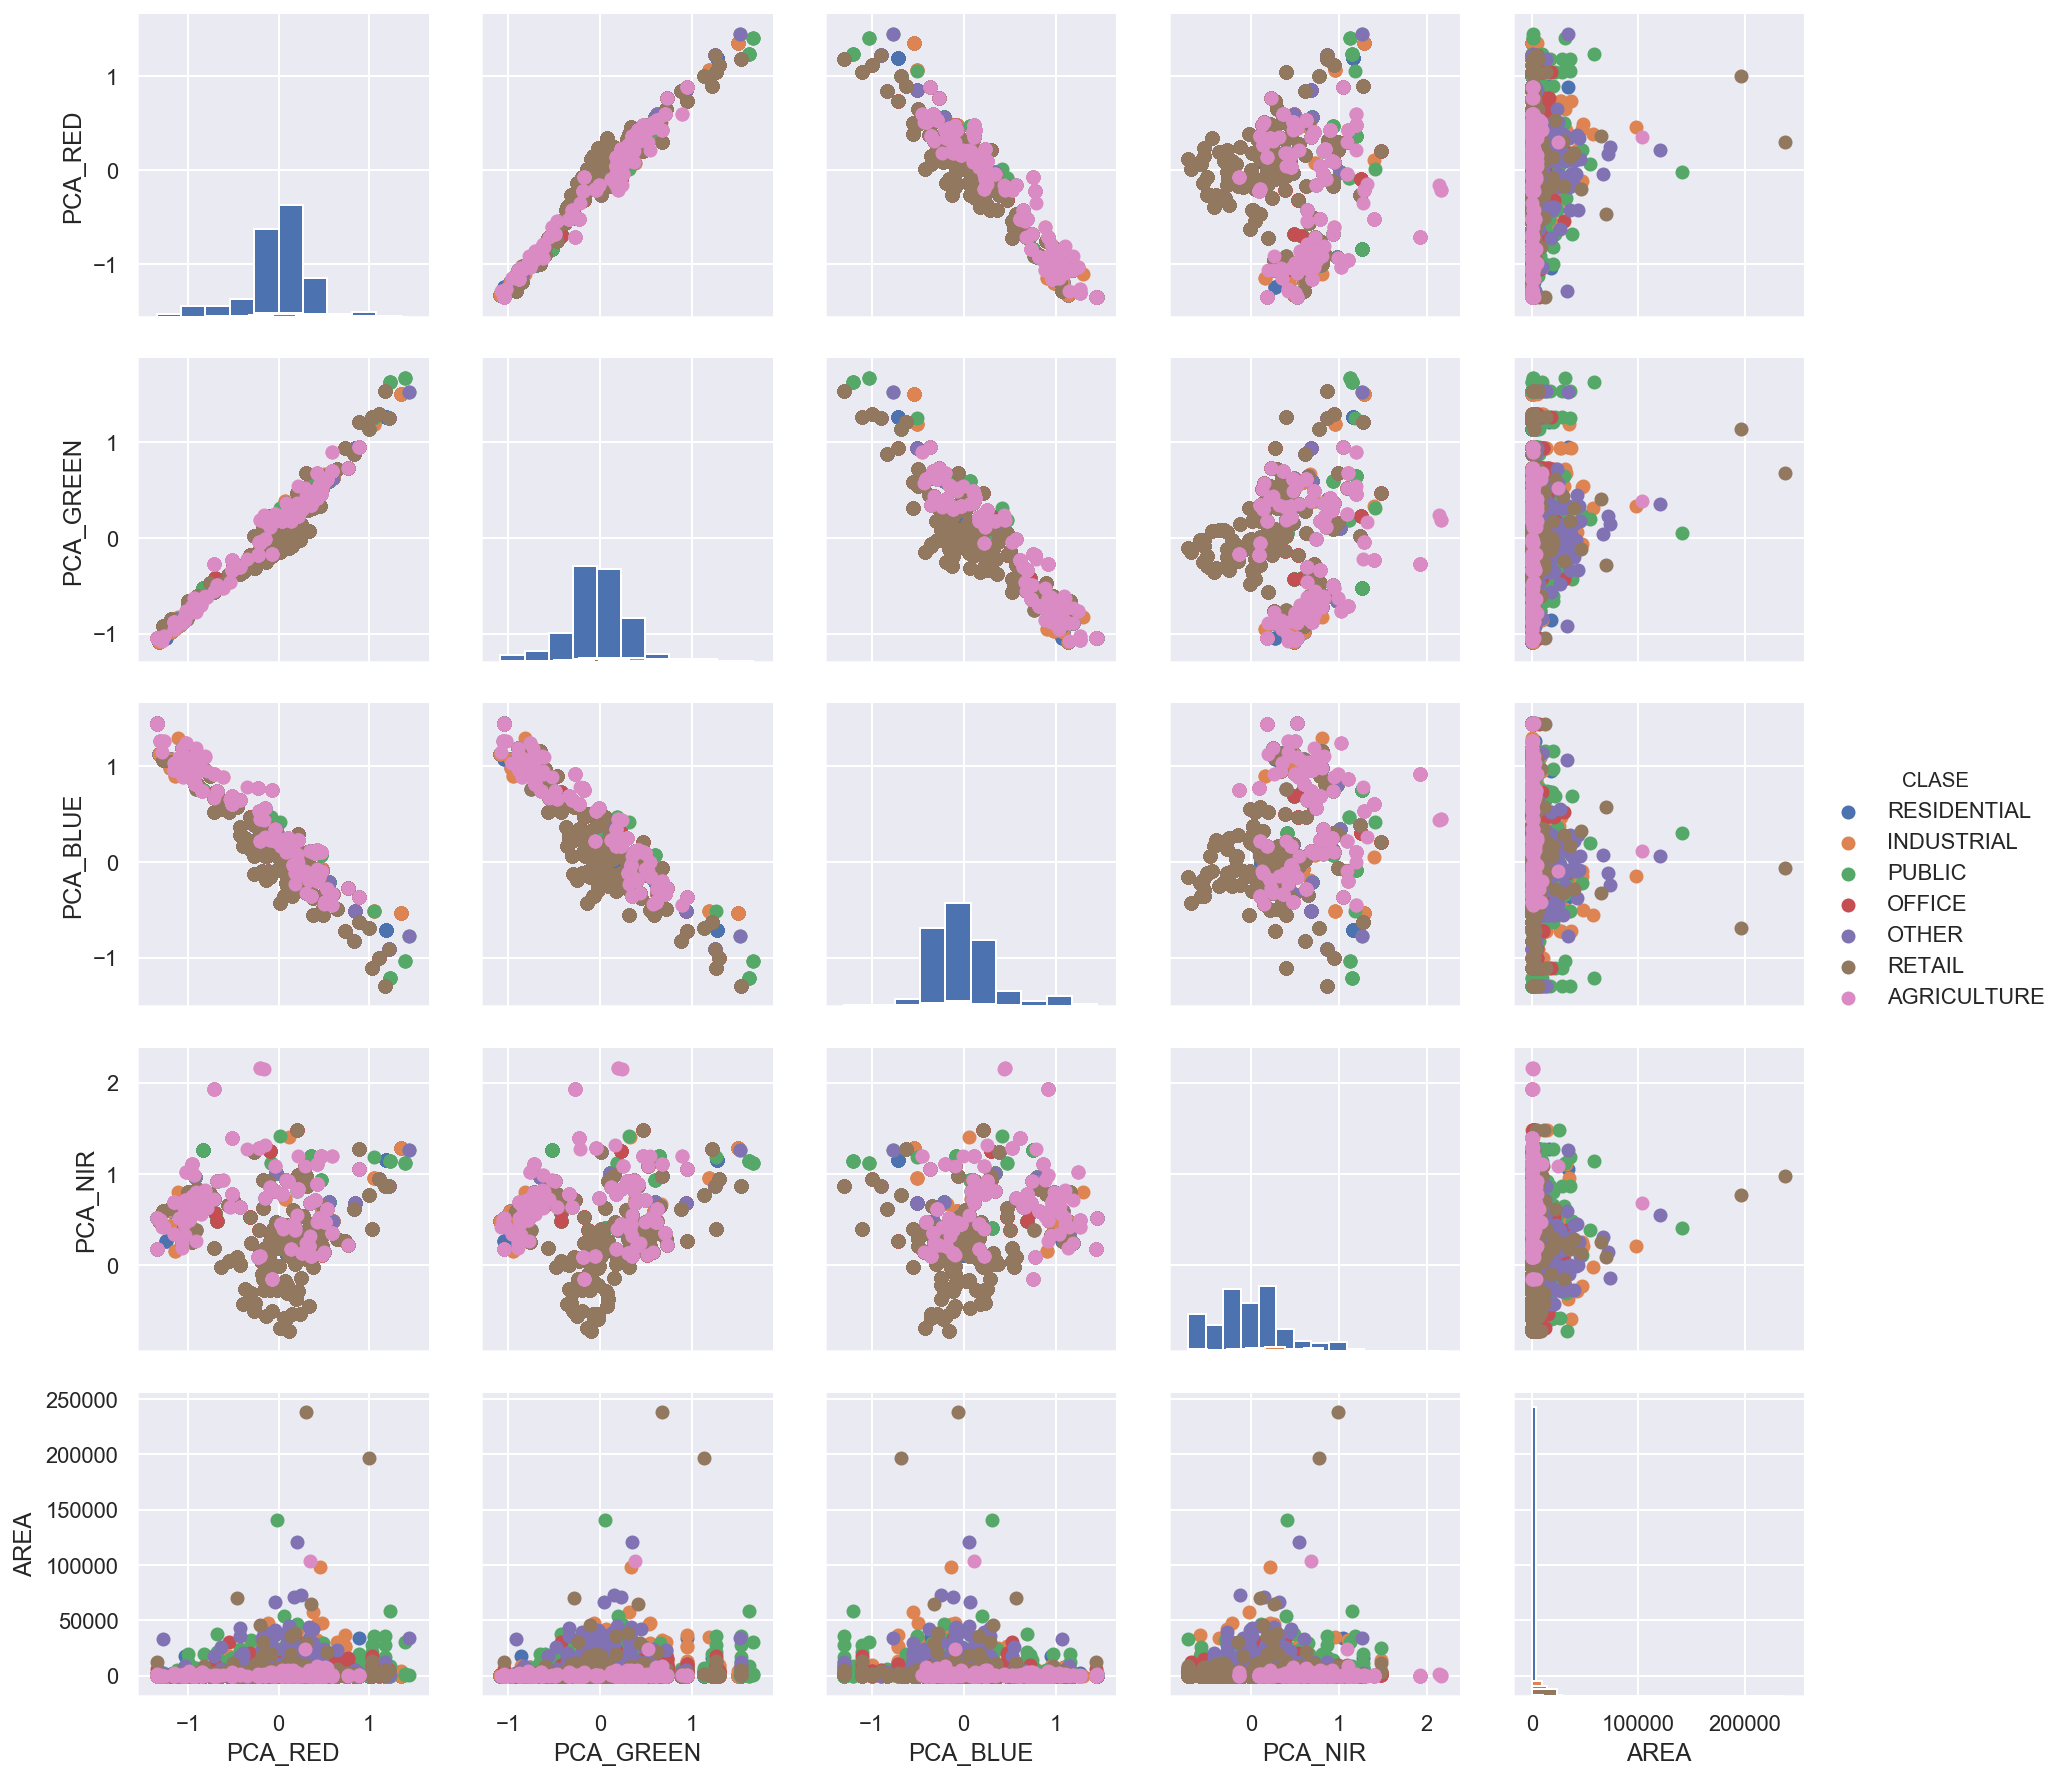

In [47]:
g = sns.PairGrid(df_pca, hue='CLASE')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

In [49]:
df_pca.corr().style.background_gradient()

,PCA_RED,PCA_GREEN,PCA_BLUE,PCA_NIR,AREA
PCA_RED,1,0.933754,-0.881623,-0.0112121,0.0422814
PCA_GREEN,0.933754,1,-0.758364,0.30384,0.0561541
PCA_BLUE,-0.881623,-0.758364,1,0.300316,-0.0313579
PCA_NIR,-0.0112121,0.30384,0.300316,1,0.0269794
AREA,0.0422814,0.0561541,-0.0313579,0.0269794,1


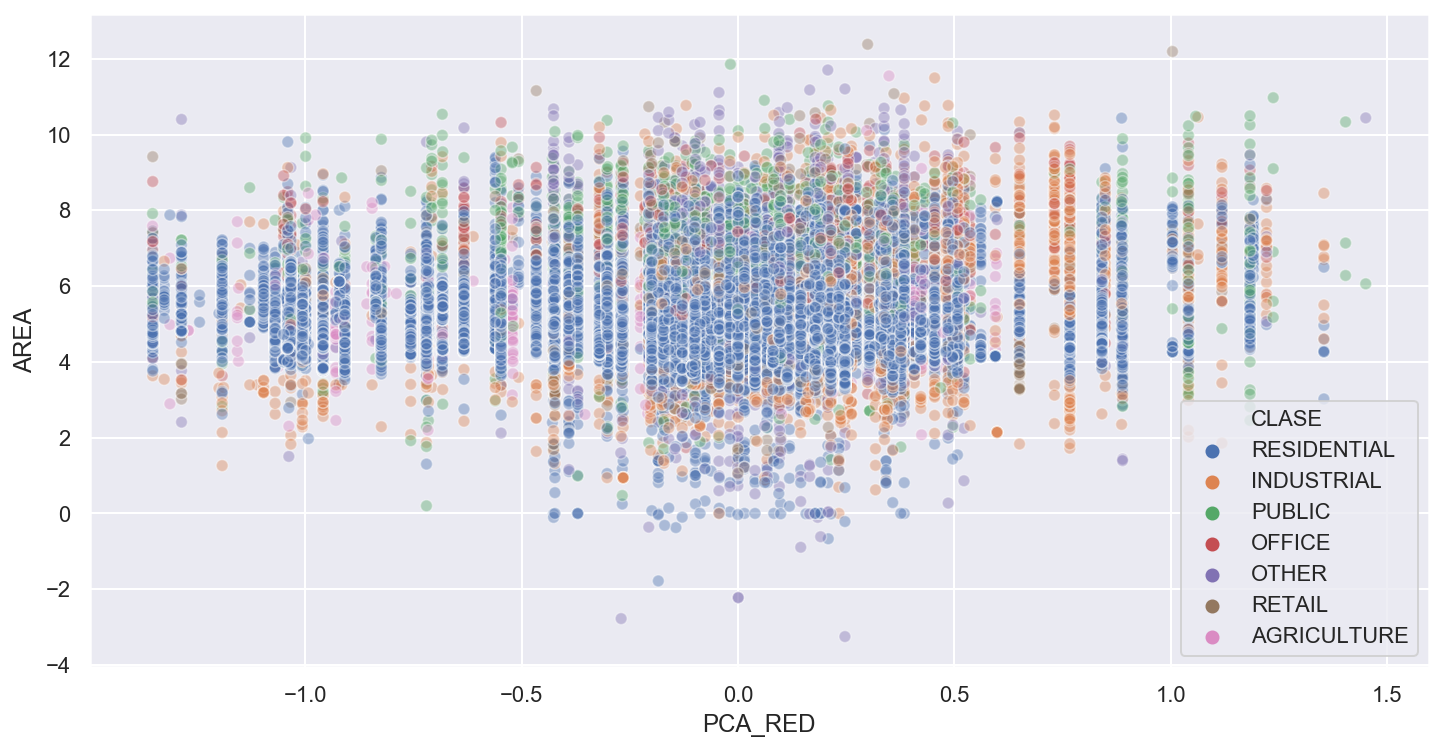

In [50]:
plt.figure(figsize=(12,6))
sns.scatterplot(df_pca['PCA_RED'], np.log(df_pca.AREA), hue=df_pca['CLASE'], alpha=0.4);

---

In [51]:
def show_results(y, y_pred):
    sns.heatmap(confusion_matrix(y, y_pred), square=True, annot=True, fmt='d', cbar=True, cmap=plt.cm.Blues)
    plt.ylabel('Clase real')
    plt.xlabel('Predicción');
    plt.gca().set_ylim(7.0, 0)
    plt.show()
    print("Resultados")
    print('Accuracy: {}'.format(round(accuracy_score(y, y_pred), 3)))

In [52]:
df_pca.head()

,PCA_RED,PCA_GREEN,PCA_BLUE,PCA_NIR,AREA,CLASE
ID,,,,,,
35984B9C3E7CD9A1,0.177954,0.320729,-0.231743,0.418293,144.426900,RESIDENTIAL
F9D04BF6D037F8FB,0.178458,0.150845,-0.137320,0.166365,38.342550,RESIDENTIAL
B89D5711AFF8C423,-0.145893,-0.001704,0.062803,0.195452,108.794384,RESIDENTIAL
1C3478AC1522E7E4,-0.560857,-0.384812,0.649119,0.657096,155.224455,RESIDENTIAL
4D12AA5009064345,-0.143461,-0.249676,-0.190577,-0.552430,1789.873366,RESIDENTIAL


In [53]:
from sklearn.model_selection import train_test_split#Para nuestro primer modelo vamos a usar todas las variables
X = df_pca[df_pca.columns[:-1]].copy()
y = df_pca['CLASE'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)

In [54]:
from sklearn.pipeline import Pipeline
import xgboost as xgb
rfc_p_model = xgb.XGBClassifier(random_state=10)

parameters = {
    'clas__max_depth': [20],
    'clas__scale_pos_weight': [1]
}

minsait_pipe_rfc_p = Pipeline(steps=[('clas', rfc_p_model)])

GSR_p = GridSearchCV(minsait_pipe_rfc_p, parameters, cv=5, n_jobs=-1, scoring='accuracy', refit=True, verbose=1)
GSR_p.fit(X_train, y_train)
    
print("Mejor score: ", GSR_p.best_score_)
print("Mejore configuración de parámetros: ", GSR_p.best_params_)

minsait_pipe_rfc_p = GSR_p.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.6min finished


Mejor score:  0.8836578461401052
Mejore configuración de parámetros:  {'clas__max_depth': 20, 'clas__scale_pos_weight': 1}


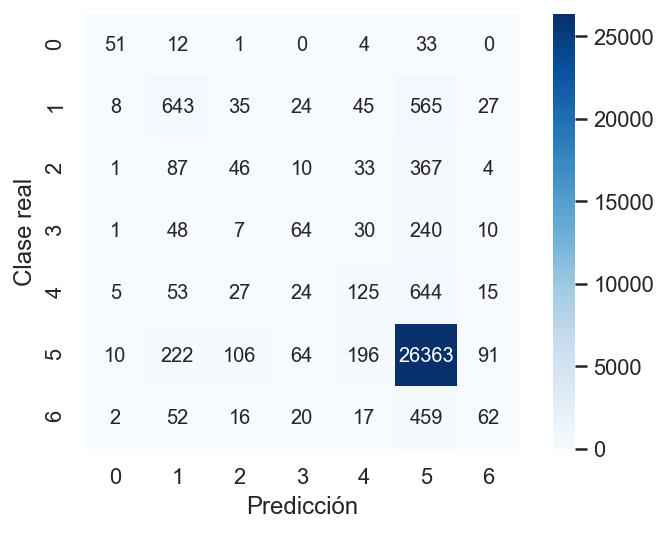

Resultados
Accuracy: 0.883


In [55]:
y_pred = minsait_pipe_rfc_p.predict(X_test)
show_results(y_test, y_pred)

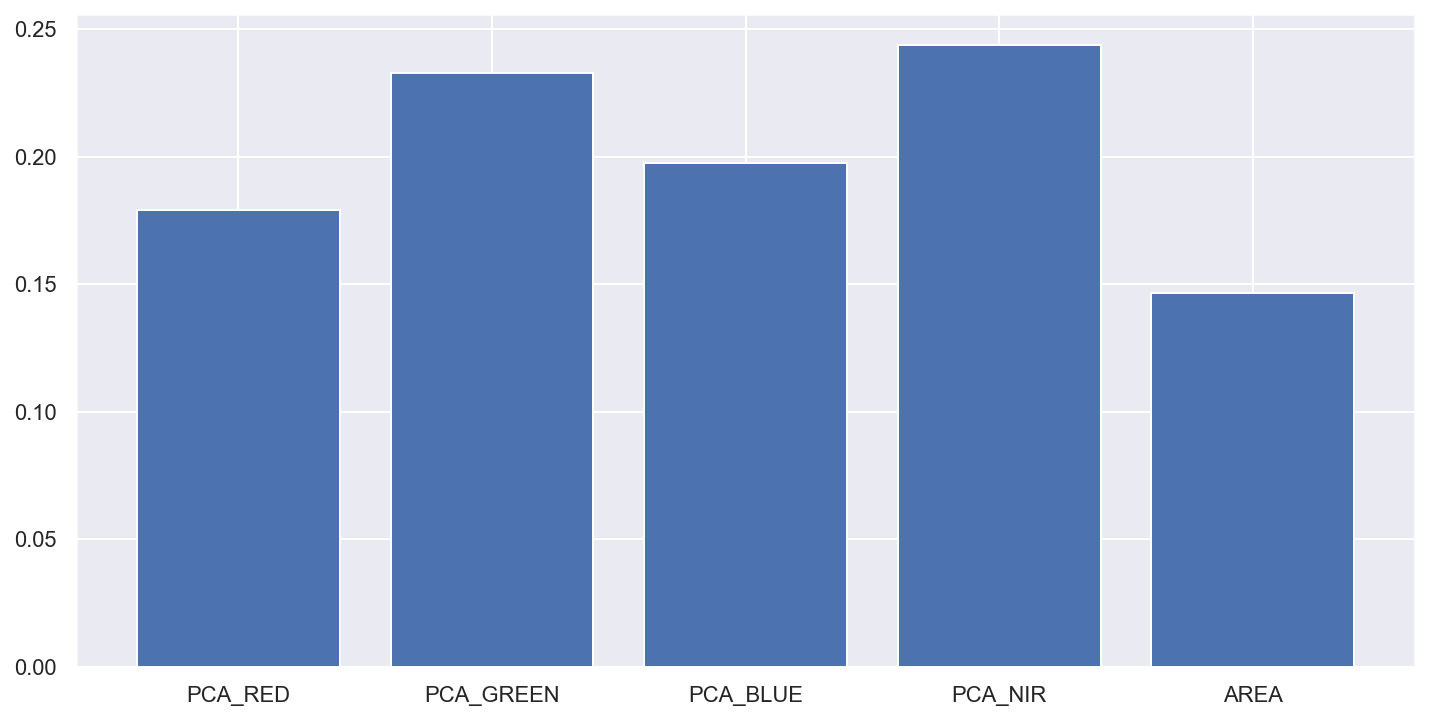

In [56]:
# plot
plt.figure(figsize=(12,6))
plt.bar(X_train.columns, minsait_pipe_rfc_p['clas'].feature_importances_)
plt.show()

In [57]:
y_test.value_counts()

RESIDENTIAL    27052
INDUSTRIAL      1347
PUBLIC           893
RETAIL           628
OFFICE           548
OTHER            400
AGRICULTURE      101
Name: CLASE, dtype: int64

In [58]:
unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))

{'AGRICULTURE': 78, 'INDUSTRIAL': 1117, 'OFFICE': 238, 'OTHER': 206, 'PUBLIC': 450, 'RESIDENTIAL': 28671, 'RETAIL': 209}
